<a href="https://colab.research.google.com/github/Rog10/Python/blob/main/Unit%203%20-%20Python%20Advanced/Assignments/Unit3_Python_Advanced_Pandas_DataWrangling_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 : Python Data Analysis using salaries dataset

# Data Exploration:  This should include summary statistics, means, medians, quartiles, or any other relevant information about the data set. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Salaries.csv')

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
# 397 rows = 397 employees
df.shape

(397, 7)

In [5]:
df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [6]:
df.tail()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329
396,397,AsstProf,A,8,4,Male,81035


In [7]:
df.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


# Mean/median of all salaries

In [12]:
# Mean of all salaries
mean_salary = df['salary'].mean()
print(mean_salary)

113706.45843828715


In [16]:
# Median of all salaries
median_salary = df['salary'].median()
print(median_salary)

107300.0


# Median salary between gender and/or rank(title) Etc...


Making a new Data Frame that only has the columns 'sex' and 'salary'

In [17]:
new_df = df[['sex','salary']]
print(new_df)

      sex  salary
0    Male  139750
1    Male  173200
2    Male   79750
3    Male  115000
4    Male  141500
..    ...     ...
392  Male  103106
393  Male  150564
394  Male  101738
395  Male   95329
396  Male   81035

[397 rows x 2 columns]


Finding the Median salary for all males

In [36]:
median_salary_males=new_df[new_df["sex"]=="Male"]['salary'].median()

In [37]:
print(median_salary_males)

108043.0


Finding the Median salary for all females

In [39]:
median_salary_females= new_df[new_df["sex"]=="Female"]['salary'].median()
print(median_salary_females)


103750.0


Comparing the Mean salary of Males and Females

In [40]:
mean_males = new_df[new_df["sex"]=="Male"]["salary"].mean()
print(mean_males)

115090.41899441341


In [41]:
mean_females = new_df[new_df["sex"]=="Female"]["salary"].mean()
print(mean_females)

101002.41025641025


In [42]:
# The difference between mean salaries of male and female
difference = mean_males - mean_females
print(difference)

14088.008738003162


# Data Wrangling – perform some basic transformations on the data

People who have 20 years of experience (Total: 157), (Mean Salary: 122,520.66)

In [57]:
exp_salary = df[['yrs.service','salary']]
print(exp_salary)

     yrs.service  salary
0             18  139750
1             16  173200
2              3   79750
3             39  115000
4             41  141500
..           ...     ...
392           30  103106
393           19  150564
394           25  101738
395           15   95329
396            4   81035

[397 rows x 2 columns]


In [58]:

exp_20 = exp_salary[exp_salary['yrs.service']>=20]
print(exp_20.count())

yrs.service    157
salary         157
dtype: int64


In [61]:
print((exp_20).mean())

yrs.service        31.057325
salary         122520.656051
dtype: float64


Comparing the salaries of people who have 20+ years of experience vs less than 20 years of experience

In [62]:
exp_less_20 = exp_salary[exp_salary['yrs.service']<20]
print((exp_less_20).mean())

yrs.service         8.820833
salary         107940.504167
dtype: float64


In [63]:
diff = exp_20.mean()[['salary']] - exp_less_20.mean()[['salary']]
print(diff.to_string())

salary    14580.151884


People who have salary of greater than or equal to 200,000

In [64]:
grater_200k = exp_salary[exp_salary['salary']>=200000]
print(grater_200k.count().to_string())

yrs.service    3
salary         3


Your Findings here...


# Rename values, subset columns, etc

In [65]:
clear_df = df
print(clear_df)

     Unnamed: 0      rank discipline  yrs.since.phd  yrs.service   sex  salary
0             1      Prof          B             19           18  Male  139750
1             2      Prof          B             20           16  Male  173200
2             3  AsstProf          B              4            3  Male   79750
3             4      Prof          B             45           39  Male  115000
4             5      Prof          B             40           41  Male  141500
..          ...       ...        ...            ...          ...   ...     ...
392         393      Prof          A             33           30  Male  103106
393         394      Prof          A             31           19  Male  150564
394         395      Prof          A             42           25  Male  101738
395         396      Prof          A             25           15  Male   95329
396         397  AsstProf          A              8            4  Male   81035

[397 rows x 7 columns]


# Create some simple visualizations showing some simple statistics

In [67]:
import seaborn as sns


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


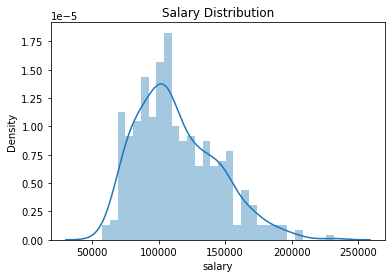

In [70]:
sns.distplot(clear_df['salary'],bins =30)
plt.title('Salary Distribution')
plt.show()

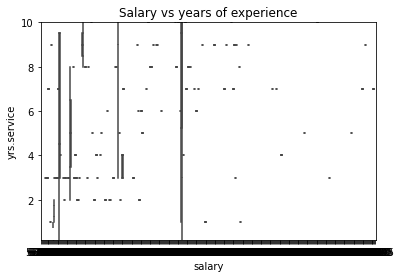

In [71]:
sns.boxplot(x = 'salary', y = 'yrs.service', data = clear_df)
plt.ylim(0.2,10)
plt.title('Salary vs years of experience')
plt.show()


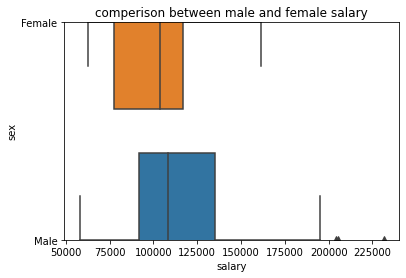

In [72]:
sns.boxplot(x = 'salary', y = 'sex', data = clear_df)
plt.ylim(0,1)
plt.title('comperison between male and female salary')
plt.show()

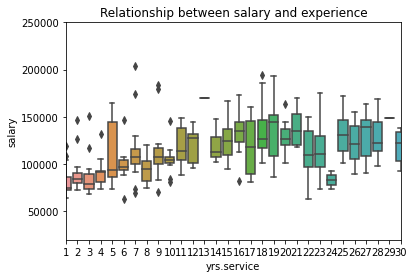

In [73]:
sns.boxplot(x = 'yrs.service', y = 'salary', data = exp_salary)
plt.ylim(20000,250000)
plt.xlim(1,30)
plt.title('Relationship between salary and experience')
plt.show()

Your observations from the visuals: 

# Draw some conclusions based on the data.  What did you discover?

Based on the analysis performed above, the conclusions are as follows:

The median salary for males is slightly higher than for female's salary.



I also discovered that the salaries of experienced employees is higher than those recently hired.



